In [1]:
!pip install ucimlrepo

In [34]:
import pandas as pd
import numpy as np

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
drug_reviews_druglib_com = fetch_ucirepo(id=461) 
  
# data (as pandas dataframes) 
X = drug_reviews_druglib_com.data.features 
y = drug_reviews_druglib_com.data.targets 
  
# metadata 
print(drug_reviews_druglib_com.metadata) 
  
# variable information 
print(drug_reviews_druglib_com.variables) 

{'uci_id': 461, 'name': 'Drug Reviews (Druglib.com)', 'repository_url': 'https://archive.ics.uci.edu/dataset/461/drug+review+dataset+druglib+com', 'data_url': 'https://archive.ics.uci.edu/static/public/461/data.csv', 'abstract': 'The dataset provides patient reviews on specific drugs along with related conditions. Reviews and ratings are grouped into reports on the three aspects benefits, side effects and overall comment.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Text'], 'num_instances': 4143, 'num_features': 8, 'feature_types': ['Integer'], 'demographics': [], 'target_col': None, 'index_col': ['reviewID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Wed Apr 03 2024', 'dataset_doi': '10.24432/C55G6J', 'creators': ['Surya Kallumadi', 'Felix Grer'], 'intro_paper': {'ID': 457, 'type': 'NATIVE', 'title': 'Aspect-Based Sentiment Analysis of D

In [4]:
X.isna().sum()

urlDrugName           0
rating                0
effectiveness         0
sideEffects           0
condition             1
benefitsReview       23
sideEffectsReview    98
commentsReview       13
dtype: int64

In [5]:
#fill null values
for col in ['benefitsReview', 'sideEffectsReview', 'commentsReview']:
    X[col].fillna('no_review', inplace = True)

X['condition'].fillna('unknown', inplace = True)

X.isna().sum()

C:\Users\wesle\AppData\Local\Temp\ipykernel_9272\2259161407.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna('no_review', inplace = True)
C:\Users\wesle\AppData\Local\Temp\ipykernel_9272\2259161407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna('no_review', inplace = True)
C:\Users\wesle\AppData\Local\Temp\i

urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            0
benefitsReview       0
sideEffectsReview    0
commentsReview       0
dtype: int64

In [6]:
#clean text features (remove extra spacing and non letter chars)
for col in ['benefitsReview', 'sideEffectsReview', 'commentsReview']:
    X[col] = (
        X[col]
        .str.replace(r"[^a-zA-Z]", " ", regex=True)
        .str.lower()
        .str.replace(r"\s+", " ", regex=True)       
        .str.strip())
X.head()

    

C:\Users\wesle\AppData\Local\Temp\ipykernel_9272\558465226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = (


,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,cough hypotension proteinuria impotence renal ...,monitor blood pressure weight and asses for re...
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,although this type of birth control has more c...,heavy cycle cramps hot flashes fatigue long la...,i hate this birth control i would not suggest ...
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,i was used to having cramps so badly that they...,heavier bleeding and clotting than normal,i took pills at the onset of my menstrual cram...
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,the acid reflux went away for a few months aft...,constipation dry mouth and some mild dizziness...,i was given prilosec prescription at a dose of...
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,i think that the lyrica was starting to help w...,i felt extremely drugged and dopey could not d...,see above


In [9]:
#check unique categories to identify proper encoding technique
for col in ['urlDrugName', 'effectiveness', 'sideEffects', 'condition']:
    print(f"{col}'s unique values: ")
    print(X[col].value_counts())
    print("--------------------------")

urlDrugName's unique values: 
urlDrugName
lexapro            74
paxil              58
retin-a            55
synthroid          53
zoloft             52
                   ..
elmiron             1
lasix               1
zovirax-topical     1
bactrim-ds          1
prevalite           1
Name: count, Length: 541, dtype: int64
--------------------------
effectiveness's unique values: 
effectiveness
4    1741
3    1238
2     572
0     329
1     263
Name: count, dtype: int64
--------------------------
sideEffects's unique values: 
sideEffects
1    1349
0    1198
2     850
3     491
4     255
Name: count, dtype: int64
--------------------------
condition's unique values: 
condition
depression                                            302
acne                                                  211
anxiety                                                90
insomnia                                               75
birth control                                          68
                            

In [8]:
#map ordinal categories to integers

effectiveness_map = {
    "Ineffective": 0,
    "Moderately Effective" : 2,
    "Marginally Effective" : 1,
    "Considerably Effective" : 3,
    "Highly Effective" : 4
}

sides_map = {
    "No Side Effects" : 0,
    "Mild Side Effects" : 1,
    "Moderate Side Effects" : 2,
    "Severe Side Effects" : 3,
    "Extremely Severe Side Effects" : 4}


X['effectiveness'] = X['effectiveness'].map(effectiveness_map)
X['sideEffects'] = X['sideEffects'].map(sides_map)

X.head()


C:\Users\wesle\AppData\Local\Temp\ipykernel_9272\1654087216.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['effectiveness'] = X['effectiveness'].map(effectiveness_map)
C:\Users\wesle\AppData\Local\Temp\ipykernel_9272\1654087216.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sideEffects'] = X['sideEffects'].map(sides_map)


,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,enalapril,4,4,1,management of congestive heart failure,slowed the progression of left ventricular dys...,cough hypotension proteinuria impotence renal ...,monitor blood pressure weight and asses for re...
1,ortho-tri-cyclen,1,4,3,birth prevention,although this type of birth control has more c...,heavy cycle cramps hot flashes fatigue long la...,i hate this birth control i would not suggest ...
2,ponstel,10,4,0,menstrual cramps,i was used to having cramps so badly that they...,heavier bleeding and clotting than normal,i took pills at the onset of my menstrual cram...
3,prilosec,3,1,1,acid reflux,the acid reflux went away for a few months aft...,constipation dry mouth and some mild dizziness...,i was given prilosec prescription at a dose of...
4,lyrica,2,1,3,fibromyalgia,i think that the lyrica was starting to help w...,i felt extremely drugged and dopey could not d...,see above


In [12]:
%pip install category_encoders


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 578.7 kB/s eta 0:00:13
   ------ --------------------------------- 1.3/8.0 MB 1.5 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.0 MB 2.1 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.0 MB 2.6 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.0 MB 3.0 MB/s eta 0:00:02
   -------------------------- ------------- 5.2/8.0 MB 3.3 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.0 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 8

In [13]:
#encode categorical features with target encoder (lots of unique levels)
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split

y = X['rating']
X = X.drop(columns = ['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

t_encoder = TargetEncoder(cols=['urlDrugName', 'condition'])
t_encoder.fit(X_train, y_train)

X_train_encoded = t_encoder.transform(X_train)
X_test_encoded = t_encoder.transform(X_test)

In [16]:
#join text features to simplify the feature space and let the model learn interactions naturally.
text_cols = ['benefitsReview', 'sideEffectsReview', 'commentsReview']

X_train_encoded = X_train_encoded.copy()
X_test_encoded = X_test_encoded.copy()

X_train_encoded["all_text"] = X_train_encoded[text_cols].agg(" ".join, axis=1)
X_test_encoded["all_text"]  = X_test_encoded[text_cols].agg(" ".join, axis=1)


In [17]:
X_train_encoded.head()

,urlDrugName,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,all_text
42,7.317385,4,0,7.444515,the stuff works like a charm fast and effective,no review,one pill mins before activity,the stuff works like a charm fast and effectiv...
2061,7.432151,2,0,6.850467,i felt calmer and my overall outlook was bette...,none that i noticed,i had alot of grief and was nervous at work so...,i felt calmer and my overall outlook was bette...
2069,7.457117,3,2,6.720359,for awhile it did prevent cold sores then i st...,fainting spells chest pain low blood pressure ...,i hope this information will help someone not ...,for awhile it did prevent cold sores then i st...
1137,7.683052,3,1,6.871369,the drug caused the depression to recede to th...,occasionally i would have trouble falling asle...,i took one tablet per day mg of the wellbutrin xl,the drug caused the depression to recede to th...
1644,7.290050,4,0,7.018229,lower blood pressure,no review,cozaar an angeotensin receptor blocker lowered...,lower blood pressure no review cozaar an angeo...


In [18]:
#train a baseline ridge model and test MAE, use tfidf to vectorize text
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=10000, ngram_range=(1,2), min_df=5)),
    ("model", Ridge(alpha=1.0))
])

pipe.fit(X_train_encoded["all_text"], y_train)
pred = pipe.predict(X_test_encoded["all_text"])

print("MAE:", mean_absolute_error(y_test, pred))


MAE: 1.8570801454171537


In [22]:
from scipy.sparse import hstack, csr_matrix
#now lets see how model does with non text features as well
X_train_new = X_train_encoded.drop(columns = text_cols)
X_test_new = X_test_encoded.drop(columns = text_cols)

tfidf = TfidfVectorizer(max_features = 10000, ngram_range = (1,2), min_df = 5)

X_train_text = tfidf.fit_transform(X_train_new['all_text'])
X_test_text = tfidf.transform(X_test_new['all_text'])

meta_cols = ["urlDrugName", "condition", "effectiveness"]  
X_train_meta = csr_matrix(X_train_encoded[meta_cols].values)
X_test_meta  = csr_matrix(X_test_encoded[meta_cols].values)

#Combine sparse text feature + meta data
X_train_full = hstack([X_train_text, X_train_meta])
X_test_full  = hstack([X_test_text, X_test_meta])


In [23]:
#fit rige model to text features and other features
model = Ridge(alpha = 0.1)
model.fit(X_train_full, y_train)
full_predict = model.predict(X_test_full)
print("MAE:", mean_absolute_error(y_test, full_predict))

MAE: 1.4659590195255936


In [25]:
#lets start grid searching for optimized model/params
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor
import numpy as np

models = {
    "Ridge": Ridge(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.2, max_iter=5000),
    "LinearSVR": LinearSVR(C=1.0),
    "SGDRegressor": SGDRegressor(loss="squared_error", alpha=1e-4, max_iter=2000, random_state=123)
}

for name, model in models.items():
    cv_mae = -cross_val_score(
        model,
        X_train_full,
        y_train,
        scoring="neg_mean_absolute_error",
        cv=5,
        n_jobs=-1
    )
    print(name, "CV MAE:", cv_mae.mean(), "±", cv_mae.std())

Ridge CV MAE: 1.293642034400087 ± 0.04949983411527652
ElasticNet CV MAE: 1.2284357050415526 ± 0.06666799257933761
LinearSVR CV MAE: 1.1463208367384847 ± 0.07258567487638852
SGDRegressor CV MAE: 1.287520859527309 ± 0.11719708053877953


In [28]:
#small grid search for optimized model params
from sklearn.model_selection import GridSearchCV
grid = {
    "C": [0.1, 0.5, 1.0, 2.0, 5.0]
}

search = GridSearchCV(
    LinearSVR(max_iter=20000, random_state=123),
    grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1
)
search.fit(X_train_full, y_train)
print("Optimized C:", search.best_params_)
print("CV MAE:", -search.best_score_)

Optimized C: {'C': 0.5}
CV MAE: 1.1455950897530733


In [29]:
#now lets test on testing holdout set
best_model = search.best_estimator_
test_pred = best_model.predict(X_test_full)

print("Test set MAE:", mean_absolute_error(y_test, test_pred))


Test set MAE: 1.2911605632486725


In [31]:
#Lets see top words 
feature_names = np.concatenate([
    tfidf.get_feature_names_out(),
    meta_cols
])

coefs = best_model.coef_

top_positive = np.argsort(coefs)[-20:]
top_negative = np.argsort(coefs)[:20]

print("Top positive words/features:")
for i in top_positive[::-1]:
    print(feature_names[i], coefs[i])

print("\nTop negative words/features:")
for i in top_negative:
    print(feature_names[i], coefs[i])


Top positive words/features:
effectiveness 1.6519508066620467
no side 1.275436138587712
none 1.205975161571673
any side 1.2019029816600628
without 1.163119344842328
condition 1.1520712102113244
used to 1.0231205625187616
had no 0.9893825227858756
amoxicillin 0.9809194465030417
in the 0.8916684456049598
used 0.8860705757462236
the morning 0.8720852098825599
each day 0.8599913887867828
the only 0.856198841909032
prozac 0.8371473262390788
gone 0.834854545043026
morning 0.8340875476861801
reduced 0.8318393087858728
bone 0.8205357900573047
better 0.7912929858056923

Top negative words/features:
severe -2.5880524159927414
the side -1.8835354598454426
horrible -1.679682590887249
off -1.4311516549041954
weakness -1.3816270544903553
stopped -1.3755961647152166
became -1.3395008170750993
nausea -1.3390626815312847
stopped taking -1.1610624970011207
in my -1.1158194419670147
extreme -1.0943785631064313
over -1.0899804421585528
sex -1.0702481615535615
had to -1.0574861771277668
sexual -1.002305895

In [32]:
#look at feature importance of non text cols
text_feature_names = tfidf.get_feature_names_out()

meta_feature_names = ['urlDrugName', 'effectiveness', 'sideEffects']

feature_names = np.concatenate([text_feature_names, meta_feature_names])

coefs = best_model.coef_

len(coefs), len(feature_names)


(10003, 10003)

In [35]:
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefs
})

meta_importance = coef_df[coef_df["feature"].isin(meta_feature_names)]
meta_importance


,feature,coefficient
2527,effectiveness,-0.155407
10000,urlDrugName,0.176377
10001,effectiveness,1.152071
10002,sideEffects,1.651951


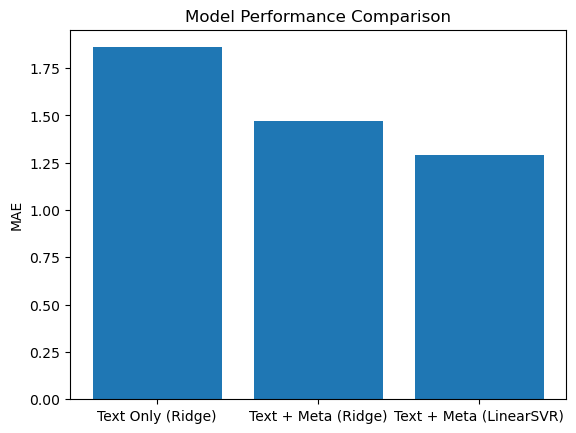

In [36]:
import matplotlib.pyplot as plt

models = ["Text Only (Ridge)", "Text + Meta (Ridge)", "Text + Meta (LinearSVR)"]
mae_scores = [1.86, 1.47, 1.29]

plt.bar(models, mae_scores)
plt.ylabel("MAE")
plt.title("Model Performance Comparison")
plt.show()


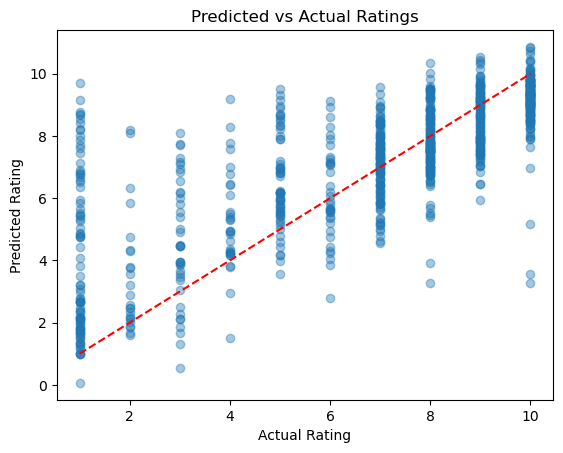

In [37]:
plt.scatter(y_test, test_pred, alpha=0.4)
plt.plot([1,10], [1,10], color="red", linestyle="--")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Predicted vs Actual Ratings")
plt.show()


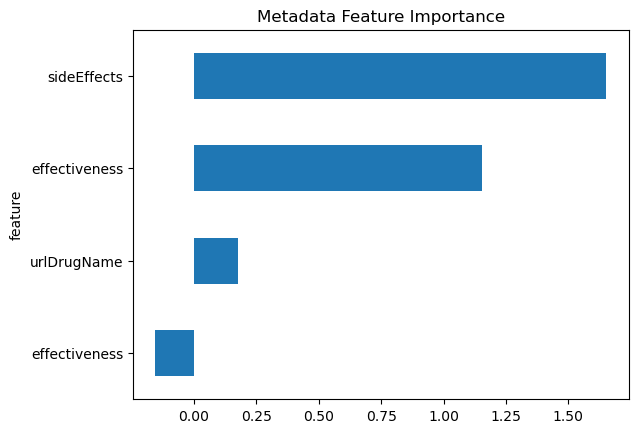

In [38]:
meta_importance.set_index("feature")["coefficient"].plot(kind="barh")
plt.title("Metadata Feature Importance")
plt.show()
